In [135]:
#@title Plotting Settings
def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max1=1.25, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, ylim_max1])
  ax[0].set_xlim([0, 22050])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_snn_spikes(spk_in, spk1_rec, spk2_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,7), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input spikes
  splt.raster(spk_in[:,0], ax[0], s=0.03, c="black")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)

  # Plot hidden layer spikes
  splt.raster(spk1_rec.reshape(num_steps, -1), ax[1], s = 0.05, c="black")
  ax[1].set_ylabel("Hidden Layer")

  # Plot output spikes
  splt.raster(spk2_rec.reshape(num_steps, -1), ax[2], c="black", marker="|")
  ax[2].set_ylabel("Output Spikes")
  ax[2].set_ylim([0, 10])

  plt.show()

def dvs_animator(spike_data):
  fig, ax = plt.subplots()
  anim = splt.animator((spike_data[:,0] + spike_data[:,1]), fig, ax)
  return anim


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
import librosa 
import librosa.display
import IPython.display as ipd
import time

In [137]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
import torch

# plotting
import matplotlib.pyplot as plt
from IPython.display import HTML

## Audio File Important Terms
Frequency (Hz) - difference of wave length

Intensity (db/power) - amplitude of wave

Sample Rate - "resolution of audio file"


In [138]:
audio_files = glob('./speech_commands_v0.02/bed/*.wav')
print(audio_files)

['./speech_commands_v0.02/bed\\00176480_nohash_0.wav', './speech_commands_v0.02/bed\\004ae714_nohash_0.wav', './speech_commands_v0.02/bed\\004ae714_nohash_1.wav', './speech_commands_v0.02/bed\\00f0204f_nohash_0.wav', './speech_commands_v0.02/bed\\00f0204f_nohash_1.wav', './speech_commands_v0.02/bed\\012187a4_nohash_0.wav', './speech_commands_v0.02/bed\\012c8314_nohash_0.wav', './speech_commands_v0.02/bed\\012c8314_nohash_1.wav', './speech_commands_v0.02/bed\\0132a06d_nohash_0.wav', './speech_commands_v0.02/bed\\0135f3f2_nohash_0.wav', './speech_commands_v0.02/bed\\0137b3f4_nohash_0.wav', './speech_commands_v0.02/bed\\014f9f65_nohash_0.wav', './speech_commands_v0.02/bed\\01648c51_nohash_0.wav', './speech_commands_v0.02/bed\\01648c51_nohash_1.wav', './speech_commands_v0.02/bed\\0165e0e8_nohash_0.wav', './speech_commands_v0.02/bed\\016e2c6d_nohash_0.wav', './speech_commands_v0.02/bed\\017c4098_nohash_0.wav', './speech_commands_v0.02/bed\\01b4757a_nohash_0.wav', './speech_commands_v0.02/be

In [139]:
# Play Audio file
ipd.Audio(audio_files[15])

In [152]:
y, sr = librosa.load(audio_files[0]) # raw data, sample rate

In [153]:
print(f'y: {y[:10]}')
print(f'sr: {sr}')

y: [ 8.2042214e-05  4.0912437e-05  7.4268813e-05  2.0718566e-04
  2.0555078e-04  3.6206460e-05 -5.6752186e-05  5.5115124e-05
  2.1946998e-04  2.0656109e-04]
sr: 22050


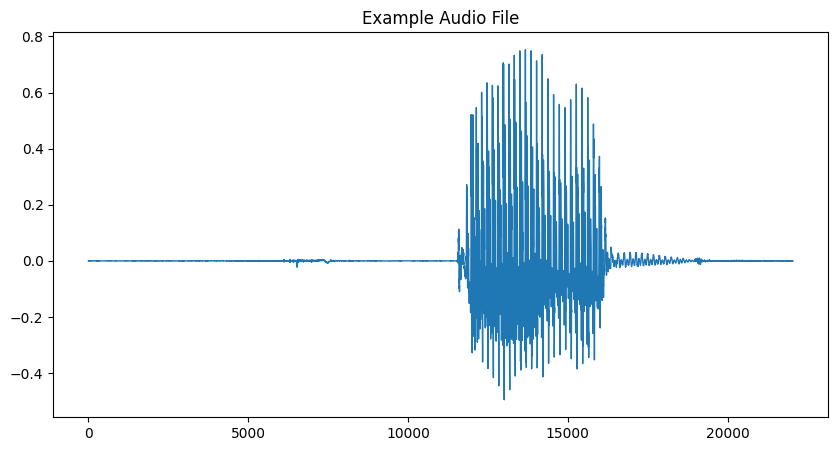

In [155]:

pd.Series(y).plot(figsize=(10,5), lw=1, title = "Example Audio File")
plt.show()

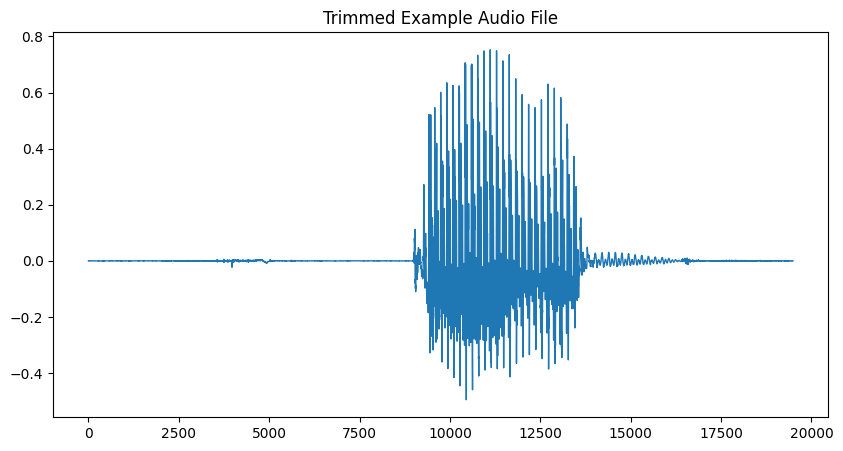

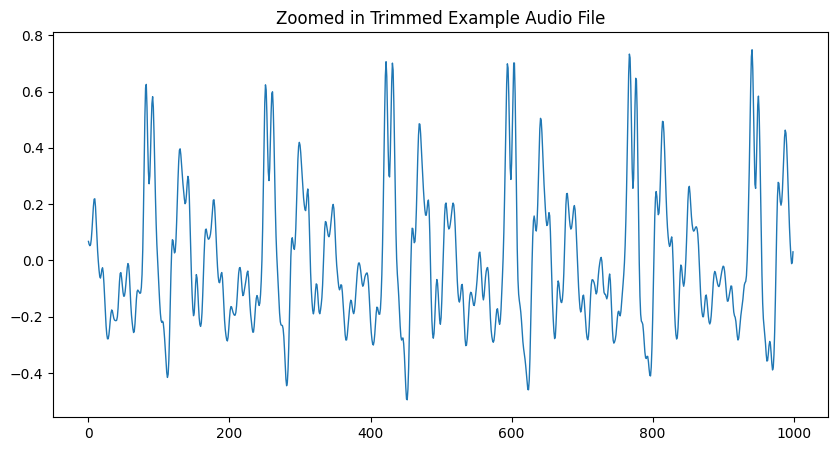

In [157]:
'''
Notice there is a lot of empty space. Librosa lets us trim the audio
'''

y_trimmed, _= librosa.effects.trim(y, top_db= 60)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title = "Trimmed Example Audio File")
plt.show()
pd.Series(y_trimmed[10000:11000]).plot(figsize=(10,5), lw=1, title = "Zoomed in Trimmed Example Audio File")
plt.show()

### Fourier Transform
A mathmatical formula that lets us break down a signal into individaul frequences and the frequenciy's amplituade 
Every signal is a set of sin and cosine waves 
(Converts from time domain?? Into Frequency domain) resulting in a spectrum

#### Fast Fourier Transform (FFT)


#### Short Fourier Transform (SFT)


https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53

(1025, 44)


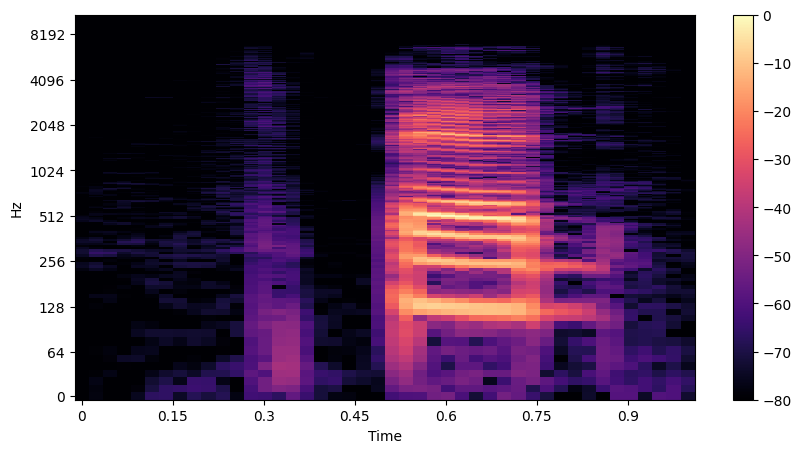

In [158]:
# Short-time Fourier transform
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S_db.shape)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax)
plt.show()

### Mels

###

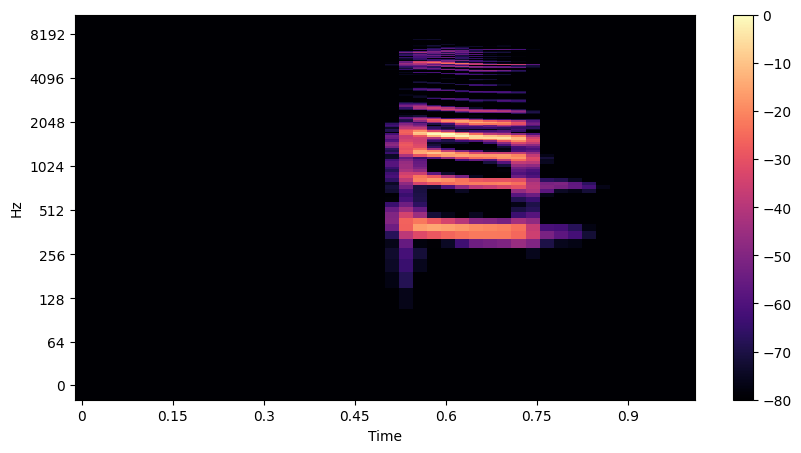

In [159]:
# What are Mells???
# Express frequencies we can hear in audio?
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2,) 
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log')
fig.colorbar(img, ax=ax)
plt.show()

In [160]:
import os
voice_directory_data = './speech_commands_v0.02'
words = []
word_file_paths = []
start_time = time.time()

word_and_path = []
for file_name in os.listdir(voice_directory_data)[0:6]:

    exclude = ["LICENSE", "testing_list.txt", "validation_list.txt", "README.md"]
    
    if file_name not in exclude:
        word = file_name
        words.append(word)
        file_name = voice_directory_data + "/" + file_name
        # print(file_name)
        word_file_paths.append(file_name)
        
        wap = (word, file_name)
        # print(wap)
        word_and_path.append(wap)

words = words[2:]
word_file_paths = word_file_paths[2:]
word_and_path = word_and_path[2:]
print(len(words), len(word_file_paths))
# words = words.sort()
end_time = time.time()
print(words)
print(f'time taken: {end_time-start_time}')

    

4 4
['bed', 'bird', 'cat', 'dog']
time taken: 0.0


In [161]:
import os
from pathlib import Path
import pandas as pd
import librosa
import threading

def process_wav(waps, words, results, id, count):
    count[id] = 0
    for wap in waps:
        word, ppath = wap
        rows = []
        for wav_path in Path(ppath).glob('*.wav'):
            path = str(wav_path)
            rd, sr = librosa.load(path)
            rd, _= librosa.effects.trim(y, top_db= 200) #Trimming
            rd = librosa.util.normalize(rd)
            # can normalize here too
            wid = words.index(word)
            # new_row = {'Word': word, 'Word_ID': wid, 'Raw_Data': sr, 'Sample_Rate': rd, 'Path': path}
            new_row = {'Word': word, 'Word_ID': wid, 'Raw_Data': rd}
            results.append(new_row)
            count[id] += 1

# word_and_path = word_and_path[0:6]
print(word_and_path)
num_threads = 6
threads = []
results = []
count = [0] * num_threads

chunk_size = int((len(word_and_path) + num_threads - 1) / num_threads)
print(f'chunk_size: {chunk_size}')
for i in range(num_threads):
    start = i * chunk_size
    if i == num_threads - 1:
        end = len(word_and_path)
    else:
        end = start + chunk_size
    t = threading.Thread(target=process_wav, args=(word_and_path[start:end], words, results, i, count))
    threads.append(t)
    t.start()

# Wait for all threads to complete
for t in threads:
    t.join()

print(len(results))

print(count)
print(sum(count), len(results))

[('bed', './speech_commands_v0.02/bed'), ('bird', './speech_commands_v0.02/bird'), ('cat', './speech_commands_v0.02/cat'), ('dog', './speech_commands_v0.02/dog')]
chunk_size: 1
8237
[2014, 2064, 2031, 2128, 0, 0]
8237 8237


In [163]:
audio_df = pd.DataFrame(results)
audio_df
    

,Word,Word_ID,Raw_Data
0,bed,0,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
1,cat,2,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
2,dog,3,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
3,bird,1,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
4,cat,2,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
...,...,...,...
8232,dog,3,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
8233,dog,3,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
8234,dog,3,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."
8235,dog,3,"[0.000109006294, 5.4358763e-05, 9.867808e-05, ..."


In [165]:
def leaky_integrate_and_fire(mem, x, w, beta, threshold=1):
  spk = (mem > threshold)
  mem = beta * mem + w*x - spk*threshold
  return spk, mem

[ 1.09006294e-04  5.43587630e-05  9.86780797e-05 ... -1.37243784e-04
  4.92579311e-05  1.55042260e-04] 22050


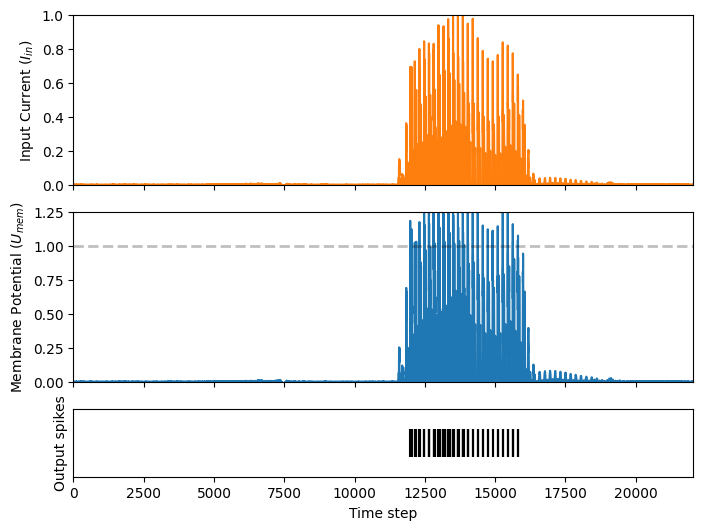

In [167]:
import torch
import snntorch as snn

import matplotlib.pyplot as plt
from IPython.display import HTML

lif = snn.Leaky(beta=0.5) #LIF neuron with a decay rate of 0.8
# lif = leaky_integrate_and_fire(beta=0.7)
w = 0.4
beta = 0.7
# Why do I lose data when I add threads? (Run out of local memory?)
num_steps = len(audio_df['Raw_Data'][0])

mem_rec = []
spk_rec = []
mem = torch.zeros(1)
spk = torch.zeros(1)

cur_in = audio_df.iloc[0]['Raw_Data']
# cur_in = abs(audio_df.iloc[0]['Raw_Data'])
offset = 0
print(cur_in, len(cur_in))

for s in range(num_steps - offset):
    step = s+offset
    l = len(cur_in)
    if(step < l):
        # spk, mem = leaky_integrate_and_fire(x[step], mem, w=w, beta=beta)
        spk, mem = lif(cur_in[step], mem)
        # print(spk, mem)
        mem_rec.append(mem)
        spk_rec.append(spk)
    # else:
    #     mem_rec.append(mem)
    #     spk_rec.append(spk)
    
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, ylim_max1=1.0)

In [168]:
# dataloader arguments
batch_size = 128
data_path='/data/mnist'

dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device) #Huh? I have cuda

cpu


In [169]:
#Split for Test and Train
from sklearn.model_selection import train_test_split
features = ['Word_ID', 'Raw_Data']
df = audio_df[features]
train_df, test_df = train_test_split(df, test_size=0.2) 

raw_data_df = pd.DataFrame(audio_df[0:5]['Raw_Data'].to_list()) 
raw_data_df

,0,1,2,3,4,5,6,7,8,9,...,22040,22041,22042,22043,22044,22045,22046,22047,22048,22049
0,0.000109,0.000054,0.000099,0.000275,0.000273,0.000048,-0.000075,0.000073,0.000292,0.000274,...,-0.00042,-0.000274,-0.000341,-0.00038,-0.000227,-0.000027,-0.000068,-0.000137,0.000049,0.000155
1,0.000109,0.000054,0.000099,0.000275,0.000273,0.000048,-0.000075,0.000073,0.000292,0.000274,...,-0.00042,-0.000274,-0.000341,-0.00038,-0.000227,-0.000027,-0.000068,-0.000137,0.000049,0.000155
2,0.000109,0.000054,0.000099,0.000275,0.000273,0.000048,-0.000075,0.000073,0.000292,0.000274,...,-0.00042,-0.000274,-0.000341,-0.00038,-0.000227,-0.000027,-0.000068,-0.000137,0.000049,0.000155
3,0.000109,0.000054,0.000099,0.000275,0.000273,0.000048,-0.000075,0.000073,0.000292,0.000274,...,-0.00042,-0.000274,-0.000341,-0.00038,-0.000227,-0.000027,-0.000068,-0.000137,0.000049,0.000155
4,0.000109,0.000054,0.000099,0.000275,0.000273,0.000048,-0.000075,0.000073,0.000292,0.000274,...,-0.00042,-0.000274,-0.000341,-0.00038,-0.000227,-0.000027,-0.000068,-0.000137,0.000049,0.000155


In [170]:
num_rows = np.shape(audio_df)[0]
num_elements = len(audio_df['Raw_Data'][0])
# for i in range(num_rows):
    # num_elements = 
    
print(f'num rows: {num_rows}')
print(f'num elements: {num_elements}')

test_tensor = torch.tensor(audio_df['Raw_Data'][0])
print(f'test_tensor: {test_tensor}')

num rows: 8237
num elements: 22050
test_tensor: tensor([ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
         4.9258e-05,  1.5504e-04])


In [171]:
# Assuming your DataFrame is named df and it has columns 'word' and 'raw_data'
# X = torch.tensor(df['Raw_Data']) # Convert your raw_data column to a list
# for i in range(len(X)):
X = df['Raw_Data'].tolist()
for i in range(len(X)):
    X[i] = X[i][offset:]
y = df['Word_ID'][:].tolist()
print(len(X), len(X[0][:]))

print(len(y))
# print(X)
# print(y)

8237 22050
8237


In [172]:

print(type(X))
print(type(y))


print(len(X[0]))
samples = len(X[0])

rm_index = []
for i in range(len(X)):
    if(len(X[i]) != samples):
        rm_index.append(i)
        
for i in rm_index[::-1]:
    y.pop(i)
    X.pop(i)
        
y = torch.tensor(y)
X = torch.tensor(X)
print(type(X))
print(type(y))
print(X)
print(y)

<class 'list'>
<class 'list'>
22050
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([[ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04],
        [ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04],
        [ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04],
        ...,
        [ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04],
        [ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04],
        [ 1.0901e-04,  5.4359e-05,  9.8678e-05,  ..., -1.3724e-04,
          4.9258e-05,  1.5504e-04]])
tensor([0, 2, 3,  ..., 3, 3, 3])


In [ ]:
from torch.utils.data import random_split, TensorDataset, DataLoader

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
print(type(dataset))



<class 'torch.utils.data.dataset.TensorDataset'>


In [181]:
dataset_size = len(dataset)
train_size = int(0.6 * dataset_size)
test_size = dataset_size - train_size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders (like the tutorials)
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


In [182]:
print(train_dataset)
print(train_loader)

In [175]:
num_inputs = len(X[0])
num_hidden = 100
beta = 0.95

num_outputs = len(words)
print(f'num inputs: {num_inputs}')
print(f'hidden: {num_hidden}')
print(f'beta: {beta}')

num inputs: 22050
hidden: 100
beta: 0.95


In [183]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
print(f"Version: {torch.__version__}, GPU: {torch.cuda.is_available()}, NUM_GPU: {torch.cuda.device_count()}")

cpu
Version: 2.2.1+cpu, GPU: False, NUM_GPU: 0


In [184]:
#copied might need to chnge but dont think so??
import torch.nn as nn
import snntorch as snn

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        self.lif2 = snn.Leaky(beta=beta)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        
        # Record the final layer
        spk2_rec = []
        mem2_rec = []

        for step in range(num_steps):
            cur1 = self.fc1(x)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)

        return torch.stack(spk2_rec, dim=0), torch.stack(mem2_rec, dim=0)
        
# Load the network onto CUDA if available
net = Net().to(device)

In [185]:
# Skipped all the way to the end Not sure how to input the data into this yet
import torch.nn as nn
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=5e-4, betas=(0.9, 0.9))


num_epochs = 1
loss_hist = []
test_loss_hist = []
counter = 0


for epoch in range(num_epochs):
    train_batch = iter(train_loader)
    print(train_batch)

    # Minibatch training loop
    for data, targets in train_batch:
        print(len(data), len(targets))
        
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        net.train()
        spk_rec, _ = net(data.flatten(1))

        # initialize the loss & sum over time
        loss_val = torch.zeros((1), dtype=dtype, device=device)
        loss_val += loss(spk_rec.sum(0), targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        # Print train/test loss/accuracy
        if counter % 1 == 0:
            print(f"Iteration: {counter} \t Train Loss: {loss_val.item()}")
        counter += 1

        if counter == 5:
          break

    train_batch = iter(train_loader)
    print(train_batch)

50 50
Iteration: 0 	 Train Loss: 620.1599731445312
50 50
Iteration: 1 	 Train Loss: 3766.320068359375
50 50
Iteration: 2 	 Train Loss: 1.3862946033477783
50 50
Iteration: 3 	 Train Loss: 1.3862946033477783
50 50
Iteration: 4 	 Train Loss: 1.3862946033477783


In [186]:
def measure_accuracy(model, dataloader):
  with torch.no_grad():
    model.eval()
    running_length = 0
    running_accuracy = 0

    for data, targets in iter(dataloader):
      data = data.to(device)
      targets = targets.to(device)

      # forward-pass
      spk_rec, _ = model(data.flatten(1))
      spike_count = spk_rec.sum(0)
      _, max_spike = spike_count.max(1)

      # correct classes for one batch
      num_correct = (max_spike == targets).sum()

      # total accuracy
      running_length += len(targets)
      running_accuracy += num_correct
    
    accuracy = (running_accuracy / running_length)

    return accuracy.item()


In [187]:
print(f"Test set accuracy: {measure_accuracy(net, test_loader)}")

Test set accuracy: 0.23600000143051147


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2400606980273141
